In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import glob

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
data_dir = r'/mnt/c/Users/simon/Documents/food-101/images'
data_dir = pathlib.Path(data_dir)
print(data_dir)

/mnt/c/Users/simon/Documents/food-101/images


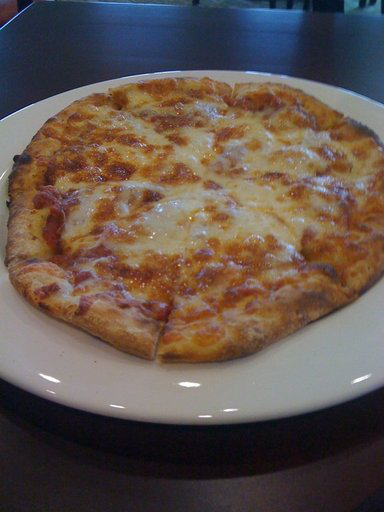

In [5]:
apple_pie = list(data_dir.glob('pizza/*'))
PIL.Image.open(str(apple_pie[90]))

In [6]:
batch_size = 40
img_height = 600
img_width = 600

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['frozen_yogurt', 'hot_dog', 'pizza']
3


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [10]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 600, 600, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 600, 600, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 300, 300, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 64)        0

In [15]:
epochs=2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/2
60/60 [==============================] - 1387s 23s/step - loss: 0.0097 - accuracy: 0.9983 - val_loss: 1.7145 - val_accuracy: 0.6600
Epoch 2/2
60/60 [==============================] - 1369s 23s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.9036 - val_accuracy: 0.6583


In [16]:
from tensorflow import keras

model.save(r'/mnt/c/Users/simon/Desktop/food-101-demo-model')

INFO:tensorflow:Assets written to: /mnt/c/Users/simon/Desktop/food-101-demo-model/assets


In [18]:
from tensorflow import keras
model = keras.models.load_model(r'/mnt/c/Users/simon/Desktop/food-101-demo-model')
predictions = model.predict(val_ds)
print(predictions)

[[ -3.2300746    2.7914424   -1.1571813 ]
 [  1.2289859   -1.9726747   -1.1036246 ]
 [  0.10645954   0.5175956   -4.5202074 ]
 ...
 [ -7.566297     3.8686848    3.4163957 ]
 [  3.157398    -2.3828318   -3.440266  ]
 [-10.638881    12.532196    -1.4826374 ]]


In [24]:
sunflower_url = "https://www.baking-sense.com/wp-content/uploads/2020/06/hot-dog-rolls-10a.jpg"
sunflower_path = tf.keras.utils.get_file('2', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print(model.predict_classes)

score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

98304/92760 [===============================] - 0s 1us/step
This image most likely belongs to hot_dog with a 98.79 percent confidence.
